In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
testbf =pd.read_csv('test.csv')
testbf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
trainbf=pd.read_csv('train.csv')
trainbf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
testbf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [ ]:
trainbf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
trainbf['Product_Category_2'].fillna(trainbf['Product_Category_2'].median(),inplace=True)
trainbf['Product_Category_3'].fillna(trainbf['Product_Category_3'].median(),inplace=True)

In [ ]:
trainbf.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
trainbf.drop('User_ID',axis=1,inplace=True)
trainbf.drop('Product_ID',axis=1,inplace=True)
trainbf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,14.0,7969


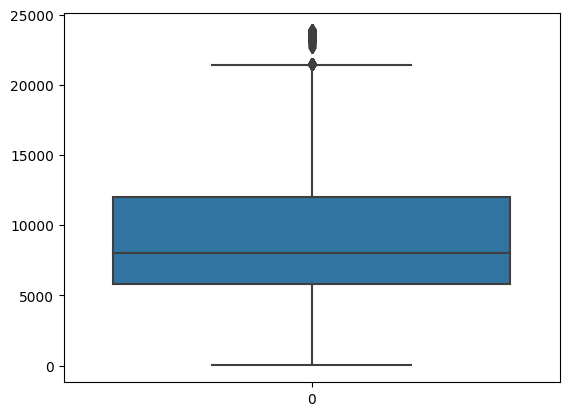

In [ ]:
sns.boxplot(trainbf.Purchase);

In [ ]:
#dealing with outliers
print(trainbf['Purchase'])
Q1=trainbf['Purchase'].quantile(0.25)
Q3=trainbf['Purchase'].quantile(0.75)

IQR=Q3-Q1
print(IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

print(upper)
print(lower)


0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64
6231.0
21400.5
-3523.5


In [ ]:
trainbf['Purchase'].where(trainbf['Purchase']<upper, trainbf['Purchase'].median(),inplace=True)
trainbf['Purchase'].where(trainbf['Purchase']>lower, trainbf['Purchase'].median(),inplace=True)

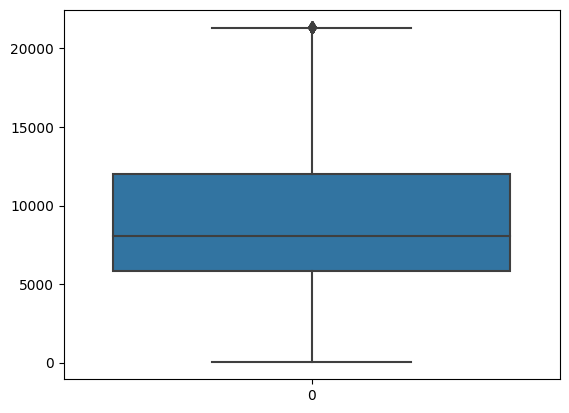

In [ ]:
sns.boxplot(trainbf.Purchase);

In [ ]:
le=LabelEncoder()

#encoding sex
trainbf.Gender=le.fit_transform(trainbf.Gender)
print(trainbf.Gender)#male 1 female 0

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64


In [ ]:
le1=LabelEncoder()

#encoding citycategory
trainbf.City_Category=le.fit_transform(trainbf.City_Category)
print(trainbf.City_Category)

0         0
1         0
2         0
3         0
4         2
         ..
550063    1
550064    2
550065    1
550066    2
550067    1
Name: City_Category, Length: 550068, dtype: int64


In [ ]:
trainbf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,0,2,0,3,9.0,14.0,8370
1,0,0-17,10,0,2,0,1,6.0,14.0,15200
2,0,0-17,10,0,2,0,12,9.0,14.0,1422
3,0,0-17,10,0,2,0,12,14.0,14.0,1057
4,1,55+,16,2,4+,0,8,9.0,14.0,7969


In [ ]:
le2=LabelEncoder()

#encoding citycategory
trainbf.Age=le.fit_transform(trainbf.Age)
print(trainbf.Age)

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int64


In [ ]:
le3=LabelEncoder()

#encoding citycategory
trainbf.Stay_In_Current_City_Years=le.fit_transform(trainbf.Stay_In_Current_City_Years)
print(trainbf.Stay_In_Current_City_Years)

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64


In [ ]:
trainbf.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,9.0,14.0,1422
3,0,0,10,0,2,0,12,14.0,14.0,1057
4,1,6,16,2,4,0,8,9.0,14.0,7969


In [ ]:
x=trainbf.iloc[:,:9]
y=trainbf.iloc[:,9]
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [ ]:
#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [ ]:
#fitting and trainig model
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

20811318.815020088
